In [163]:
import os
try:
    import mkl
    mkl.set_num_threads(1)
except:
    pass

os.environ['OPENBLAS_NUM_THREADS'] = "1"
os.environ['OMP_NUM_THREADS'] = "1"


In [164]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import kwant
import functions_spins as func
from types import SimpleNamespace
import scipy.sparse.linalg as sla

import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Kwant Simulations

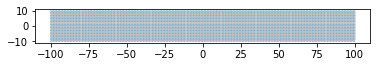

In [169]:
syst = func.make_system(a=1, W=4, L=200, Wsc=8)
# syst = func.make_system(a=6, W=30, L=60, dL=20, Wsc=30)
# syst = func.make_system(a=6, W=30, L=480, dL=20, Wsc=60)
# dx = 20
# syst = func.make_system(a=dx, W=40, L=300, dL=20, Wsc=60)
kwant.plot(syst);

In [170]:
# par = SimpleNamespace(t=32, mu=12.50, e_z=0.0, alpha=2.848, delta=0.3)
t0 = 1.0 / (2 * 0.026 * (dx / 0.0529)**2) * 27211
print(t0)
par = SimpleNamespace(t=1, mu=0.25, e_z=0.10, alpha=0.50, delta=0.25, phi=0.)
# par = SimpleNamespace(t=t0, mu=0.07925, e_z=0.10, alpha=0.010, delta=0.15, phi=0.)
# par = SimpleNamespace(t=t0, mu=9.25, e_z=0.0, alpha=10, delta=0.15, phi=0.)
kwant.plotter.bands(syst.leads[0], show=False, args=[par])
plt.ylim(-1.5, 1.5)

3.6609391591346157


IndexError: list index out of range

In [174]:
ezs = np.arange(0.1, 0.4, 10.1)
phis = np.arange(0, 6.35, 0.2)
# phis = np.arange(2.60, 3.75, 0.02)
energies_all = []
Ts_all = []
for ez in ezs:
    Ts = []
    energies = []
    evecs = []
    for phi in phis:
#         par = SimpleNamespace(t=32, mu=12.50, e_z=0.1, alpha=2.848, delta=0.064, phi=phi)
#         par = SimpleNamespace(t=32, mu=12.50, e_z=ez, alpha=2.848, delta=0.064, phi=phi)
        par = SimpleNamespace(t=1, mu=2.20, e_z=ez, alpha=0.50, delta=0.3, phi=phi)
#         par = SimpleNamespace(t=t0, mu=72.5, e_z=ez, alpha=10, delta=0.25, phi=phi)

        ham_mat = syst.hamiltonian_submatrix(args=[par], sparse=True)
        # we only calculate the 15 lowest eigenvalues
#         ev, evec = sla.eigsh(ham_mat, k=6, which='SM', return_eigenvectors=True, maxiter=80000)
        n_values = 16
        ev = func.sparse_eigs(ham_mat, n_eigs=n_values, n_vec_lanczos=3*n_values+10, sigma=0.0)


#         %time ev = sla.eigsh(ham_mat, k=6, which='SM', sigma=0, return_eigenvectors=False)
        energies.append(ev)
        evecs.append(evec)
        
#         lhs, norb = syst.hamiltonian_submatrix([par], sparse=True,return_norb=True)[:2]
#         print(lhs, norb)
    
#         smatrix = kwant.smatrix(syst, energy=ez, args=[par]) #na razie nie dziala nie wiem czemu
# #         smatrix = kwant.smatrix(syst, energy=ezs, params=[par]) #na razie nie dziala nie wiem czemu
#         Ts.append(smatrix.submatrix(0, 0).shape[0] -
#                     smatrix.transmission(0, 0) +
#                     smatrix.transmission(1, 0))

    Ts_all.append(Ts)
    energies_all.append(energies)
    
Ts_all = np.array(Ts_all)
energies_all = np.array(energies_all)


/root/miniconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:16: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
  app.launch_new_instance()


In [61]:
# print(Ts, currents)
# f = open('Ts.txt', 'w') #note 'w' = write mode
# for i in range(0,len(Ts)):
#     f.write('%f\t %f\t %f\n ' % (fluxes[i], Ts[i], currents[i]))
# f.close()

(3, 16) (3,)


Text(0, 0.5, 'E')

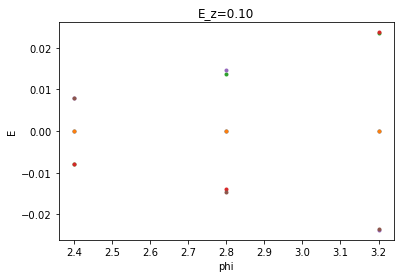

In [173]:
# Ts_all = np.array(Ts_all)
# energies_all = np.array(energies_all)

# print(energies_all.shape, phis.shape)

# plt.plot(phis, currents, "-")
# plt.plot(phis, energies, "-")

energies = np.array(energies)
print(energies.shape, phis.shape)
for i in range(6):
    plt.plot(phis, (energies_all[0, :, i]), ".")
#     plt.plot(phis[:1], energies[:,i], ".")

plt.title('E_z=%.2f' %par.e_z)
plt.xlabel('phi')
plt.ylabel('E')

# Proba zrobienia tych wektorow wlasnych

(1, 16884, 6)


/root/miniconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: The plotted data contains 1.18% of values overflowing upper limit 0.000470568 
  """


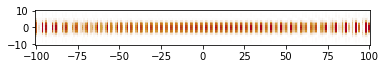

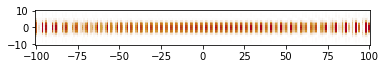

In [157]:
evecs = np.array(evecs)
print(evecs.shape)
# for i in range(evecs.shape):
# #     plt.plot(phis, (energies_all[1, :, i]), ".")
kwant.plotter.map(syst, np.abs(evecs[0, 1::4, 0])**2, colorbar=False, oversampling=1)

(46, 16) (16,)


Text(0.5, 1.0, 'T')

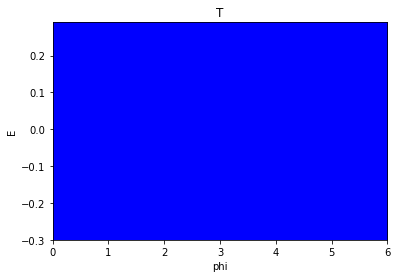

In [185]:
print(Ts_all.shape, phis.shape)
num=8
# plt.plot(phis, Ts_all[num,:], "o-")
# plt.plot(ezs, Ts_all[:,num], "o-")

plt.figure()
plt.imshow(Ts_all, aspect='auto', origin='lower',
           extent=(phis[0], phis[-1], ezs[0], ezs[-1]), cmap='bwr')
plt.xlabel('phi')
plt.ylabel('E')
plt.title('T')


In [ ]:
par = SimpleNamespace(t=1, mu=2.20, e_z=0.20, alpha=0.50, delta=0.3, phi=1.)
# smatrix = kwant.smatrix(syst, energy=0.0, args=[par])
ham_mat = syst.hamiltonian_submatrix(args=[par], sparse=True)
evals, evecs = sla.eigsh(ham_mat, k=30, sigma=0, which='SM')#, maxiter=1e6, tol=1e-2)


/root/miniconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:3: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:

print(evecs.shape, evals)
# Plot the probability density of the 10th eigenmode.
kwant.plotter.map(syst, np.abs(evecs[1::4, 0])**2, colorbar=True, oversampling=1)
